In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

38


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/100
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.50442 stdev: 0.05292
Best fitness: 0.65801 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.178
Mean genetic distance 2.940, standard deviation 0.489
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 14.317 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52115 stdev: 0.05887
Best fitness: 0.68893 - size: (2, 13) - species 6 - id 215
Average adjusted fitness: 0.163
Mean genetic distance 3.056, standard deviation 0.464
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 13.065 sec (13.691 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53505 stdev: 0.06100
Best fitness: 0.68893 - size: (2, 13) - species 6 - id 215
Average adjusted fitness: 0.142
Mean genetic distance 3.041, standard deviation 0.481
Population of 197 members in 36 species

Population's average fitness: 0.58861 stdev: 0.07132
Best fitness: 0.74954 - size: (5, 17) - species 31 - id 1978
Average adjusted fitness: 0.201
Mean genetic distance 3.195, standard deviation 0.521
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 24.787 sec (17.137 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.58177 stdev: 0.07638
Best fitness: 0.74954 - size: (5, 17) - species 31 - id 1978
Average adjusted fitness: 0.196
Mean genetic distance 3.180, standard deviation 0.518
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 21.346 sec (17.676 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.58475 stdev: 0.07585
Best fitness: 0.74954 - size: (5, 17) - species 31 - id 1978
Average adjusted fitness: 0.178
Mean genetic distance 3.155, standard deviation 0.519
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.539 sec (18.080 average)

 

Population's average fitness: 0.64798 stdev: 0.10305
Best fitness: 0.78417 - size: (5, 21) - species 44 - id 2439
Average adjusted fitness: 0.290
Mean genetic distance 3.250, standard deviation 0.504
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 18.368 sec (16.495 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64865 stdev: 0.11412
Best fitness: 0.79221 - size: (3, 16) - species 44 - id 2543
Average adjusted fitness: 0.368
Mean genetic distance 3.277, standard deviation 0.500
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 16.777 sec (16.549 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62850 stdev: 0.11484
Best fitness: 0.79221 - size: (3, 16) - species 33 - id 2543
Average adjusted fitness: 0.368
Mean genetic distance 3.315, standard deviation 0.493
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 16.939 sec (16.639 average)

 

Population's average fitness: 0.61483 stdev: 0.10758
Best fitness: 0.79221 - size: (6, 17) - species 35 - id 1732
Average adjusted fitness: 0.327
Mean genetic distance 3.146, standard deviation 0.484
Population of 209 members in 46 species
Total extinctions: 0
Generation time: 17.672 sec (15.585 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60991 stdev: 0.10848
Best fitness: 0.79221 - size: (6, 17) - species 35 - id 1732
Average adjusted fitness: 0.302
Mean genetic distance 3.139, standard deviation 0.482
Population of 194 members in 46 species
Total extinctions: 0
Generation time: 16.444 sec (15.771 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62898 stdev: 0.09865
Best fitness: 0.79221 - size: (6, 17) - species 35 - id 1732
Average adjusted fitness: 0.322
Mean genetic distance 3.132, standard deviation 0.495
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 15.942 sec (15.932 average)

 

Population's average fitness: 0.60622 stdev: 0.10361
Best fitness: 0.78973 - size: (3, 16) - species 4 - id 1089
Average adjusted fitness: 0.263
Mean genetic distance 3.175, standard deviation 0.517
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 21.363 sec (15.793 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60263 stdev: 0.10416
Best fitness: 0.78973 - size: (3, 16) - species 4 - id 1089
Average adjusted fitness: 0.258
Mean genetic distance 3.171, standard deviation 0.509
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 19.601 sec (16.269 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60580 stdev: 0.10696
Best fitness: 0.78973 - size: (3, 16) - species 4 - id 1089
Average adjusted fitness: 0.268
Mean genetic distance 3.161, standard deviation 0.496
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 15.246 sec (16.155 average)

 *****

Population's average fitness: 0.52479 stdev: 0.09289
Best fitness: 0.70996 - size: (2, 13) - species 2 - id 173
Average adjusted fitness: 0.221
Mean genetic distance 2.896, standard deviation 0.446
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 7.631 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56308 stdev: 0.09993
Best fitness: 0.75015 - size: (3, 15) - species 7 - id 352
Average adjusted fitness: 0.244
Mean genetic distance 3.000, standard deviation 0.473
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.980 sec (7.806 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59582 stdev: 0.09249
Best fitness: 0.75448 - size: (4, 18) - species 15 - id 534
Average adjusted fitness: 0.248
Mean genetic distance 3.078, standard deviation 0.480
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 8.126 sec (7.913 average)

 ****** Running generation 3 *

Population's average fitness: 0.63524 stdev: 0.11657
Best fitness: 0.79839 - size: (8, 23) - species 14 - id 1995
Average adjusted fitness: 0.293
Mean genetic distance 3.307, standard deviation 0.526
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 10.495 sec (10.086 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63112 stdev: 0.11555
Best fitness: 0.79839 - size: (8, 23) - species 14 - id 1995
Average adjusted fitness: 0.356
Mean genetic distance 3.309, standard deviation 0.523
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.931 sec (10.242 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63928 stdev: 0.11239
Best fitness: 0.79839 - size: (8, 23) - species 14 - id 1995
Average adjusted fitness: 0.335
Mean genetic distance 3.324, standard deviation 0.514
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 11.267 sec (10.430 average)

 

Population's average fitness: 0.67104 stdev: 0.13545
Best fitness: 0.81633 - size: (6, 20) - species 26 - id 1803
Average adjusted fitness: 0.387
Mean genetic distance 3.143, standard deviation 0.505
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 12.813 sec (12.874 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66384 stdev: 0.14080
Best fitness: 0.81633 - size: (6, 20) - species 26 - id 1803
Average adjusted fitness: 0.400
Mean genetic distance 3.173, standard deviation 0.506
Population of 210 members in 35 species
Total extinctions: 0
Generation time: 11.563 sec (12.941 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64611 stdev: 0.15618
Best fitness: 0.81633 - size: (6, 20) - species 26 - id 1803
Average adjusted fitness: 0.362
Mean genetic distance 3.190, standard deviation 0.509
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 11.873 sec (12.955 average)

 

Population's average fitness: 0.60787 stdev: 0.09669
Best fitness: 0.74706 - size: (5, 19) - species 39 - id 668
Average adjusted fitness: 0.224
Mean genetic distance 3.212, standard deviation 0.480
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 12.248 sec (11.802 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60158 stdev: 0.10299
Best fitness: 0.74706 - size: (5, 19) - species 39 - id 668
Average adjusted fitness: 0.295
Mean genetic distance 3.247, standard deviation 0.491
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 16.797 sec (12.530 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60719 stdev: 0.10339
Best fitness: 0.74706 - size: (5, 19) - species 39 - id 668
Average adjusted fitness: 0.285
Mean genetic distance 3.235, standard deviation 0.492
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 14.317 sec (12.751 average)

 ***

Population's average fitness: 0.59357 stdev: 0.09356
Best fitness: 0.77922 - size: (2, 13) - species 29 - id 75
Average adjusted fitness: 0.222
Mean genetic distance 3.148, standard deviation 0.469
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 9.216 sec (9.499 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60237 stdev: 0.08490
Best fitness: 0.77922 - size: (2, 13) - species 33 - id 75
Average adjusted fitness: 0.232
Mean genetic distance 3.134, standard deviation 0.495
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 10.770 sec (9.658 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60455 stdev: 0.09020
Best fitness: 0.77922 - size: (2, 13) - species 33 - id 75
Average adjusted fitness: 0.288
Mean genetic distance 3.145, standard deviation 0.484
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 10.729 sec (9.777 average)

 ****** Runni

Population's average fitness: 0.49527 stdev: 0.06053
Best fitness: 0.64378 - size: (2, 13) - species 4 - id 19
Average adjusted fitness: 0.230
Mean genetic distance 2.913, standard deviation 0.504
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.610 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52951 stdev: 0.05706
Best fitness: 0.74088 - size: (3, 15) - species 16 - id 320
Average adjusted fitness: 0.180
Mean genetic distance 3.005, standard deviation 0.489
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.006 sec (7.808 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53498 stdev: 0.06421
Best fitness: 0.74088 - size: (3, 15) - species 16 - id 320
Average adjusted fitness: 0.147
Mean genetic distance 3.065, standard deviation 0.494
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 10.248 sec (8.621 average)

 ****** Running generation 3 

Population's average fitness: 0.60856 stdev: 0.08799
Best fitness: 0.80148 - size: (6, 25) - species 39 - id 3110
Average adjusted fitness: 0.176
Mean genetic distance 3.175, standard deviation 0.518
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 13.949 sec (15.134 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61771 stdev: 0.08743
Best fitness: 0.80148 - size: (6, 25) - species 39 - id 3110
Average adjusted fitness: 0.183
Mean genetic distance 3.192, standard deviation 0.513
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 13.602 sec (14.767 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60733 stdev: 0.08963
Best fitness: 0.80148 - size: (6, 25) - species 39 - id 3110
Average adjusted fitness: 0.152
Mean genetic distance 3.191, standard deviation 0.514
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 14.751 sec (14.546 average)

 

Population's average fitness: 0.58568 stdev: 0.07209
Best fitness: 0.75325 - size: (5, 18) - species 21 - id 1802
Average adjusted fitness: 0.246
Mean genetic distance 3.238, standard deviation 0.491
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 15.533 sec (16.163 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58457 stdev: 0.08047
Best fitness: 0.75325 - size: (5, 18) - species 21 - id 1802
Average adjusted fitness: 0.245
Mean genetic distance 3.255, standard deviation 0.496
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 19.532 sec (16.670 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.58783 stdev: 0.07923
Best fitness: 0.75325 - size: (5, 18) - species 21 - id 1802
Average adjusted fitness: 0.247
Mean genetic distance 3.282, standard deviation 0.490
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 21.243 sec (17.161 average)

 

Population's average fitness: 0.58136 stdev: 0.06385
Best fitness: 0.71058 - size: (5, 19) - species 11 - id 1315
Average adjusted fitness: 0.168
Mean genetic distance 3.164, standard deviation 0.516
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 14.785 sec (14.688 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58471 stdev: 0.06895
Best fitness: 0.71058 - size: (5, 19) - species 11 - id 1315
Average adjusted fitness: 0.205
Mean genetic distance 3.178, standard deviation 0.511
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 15.388 sec (14.904 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58384 stdev: 0.07125
Best fitness: 0.72851 - size: (5, 19) - species 11 - id 2045
Average adjusted fitness: 0.211
Mean genetic distance 3.185, standard deviation 0.512
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 15.469 sec (15.039 average)

 

Population's average fitness: 0.58591 stdev: 0.09050
Best fitness: 0.74892 - size: (3, 16) - species 2 - id 1049
Average adjusted fitness: 0.223
Mean genetic distance 3.185, standard deviation 0.495
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 19.669 sec (20.336 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59122 stdev: 0.08190
Best fitness: 0.74892 - size: (3, 16) - species 2 - id 1049
Average adjusted fitness: 0.229
Mean genetic distance 3.179, standard deviation 0.493
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 23.224 sec (20.697 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58926 stdev: 0.08691
Best fitness: 0.74892 - size: (3, 16) - species 2 - id 1049
Average adjusted fitness: 0.203
Mean genetic distance 3.211, standard deviation 0.505
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 24.935 sec (21.168 average)

 *****

Population's average fitness: 0.46785 stdev: 0.09002
Best fitness: 0.68151 - size: (2, 13) - species 4 - id 50
Average adjusted fitness: 0.185
Mean genetic distance 2.969, standard deviation 0.476
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 12.463 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54737 stdev: 0.09527
Best fitness: 0.77427 - size: (3, 14) - species 1 - id 376
Average adjusted fitness: 0.292
Mean genetic distance 3.048, standard deviation 0.491
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 12.824 sec (12.643 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56711 stdev: 0.09910
Best fitness: 0.77427 - size: (3, 14) - species 4 - id 376
Average adjusted fitness: 0.248
Mean genetic distance 3.079, standard deviation 0.474
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 12.373 sec (12.553 average)

 ****** Running generation 

Population's average fitness: 0.62824 stdev: 0.11508
Best fitness: 0.81756 - size: (4, 17) - species 40 - id 1188
Average adjusted fitness: 0.285
Mean genetic distance 3.305, standard deviation 0.475
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 20.346 sec (16.002 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63057 stdev: 0.11575
Best fitness: 0.81756 - size: (4, 17) - species 40 - id 1188
Average adjusted fitness: 0.330
Mean genetic distance 3.315, standard deviation 0.481
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 15.911 sec (16.103 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63127 stdev: 0.11690
Best fitness: 0.81756 - size: (4, 17) - species 40 - id 1188
Average adjusted fitness: 0.281
Mean genetic distance 3.334, standard deviation 0.483
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 15.329 sec (16.235 average)

 

Population's average fitness: 0.61510 stdev: 0.09795
Best fitness: 0.78912 - size: (3, 14) - species 32 - id 1763
Average adjusted fitness: 0.264
Mean genetic distance 3.122, standard deviation 0.519
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 16.251 sec (15.281 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61622 stdev: 0.10209
Best fitness: 0.78912 - size: (3, 14) - species 32 - id 1763
Average adjusted fitness: 0.350
Mean genetic distance 3.170, standard deviation 0.511
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 14.389 sec (15.362 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62517 stdev: 0.09203
Best fitness: 0.78912 - size: (3, 14) - species 32 - id 1763
Average adjusted fitness: 0.338
Mean genetic distance 3.195, standard deviation 0.501
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 14.733 sec (15.533 average)

 

Population's average fitness: 0.61647 stdev: 0.12641
Best fitness: 0.83550 - size: (3, 15) - species 12 - id 1311
Average adjusted fitness: 0.358
Mean genetic distance 3.115, standard deviation 0.497
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 24.978 sec (20.193 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62408 stdev: 0.12721
Best fitness: 0.83550 - size: (3, 15) - species 12 - id 1311
Average adjusted fitness: 0.291
Mean genetic distance 3.120, standard deviation 0.495
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 30.826 sec (21.641 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62205 stdev: 0.13205
Best fitness: 0.83550 - size: (3, 15) - species 12 - id 1311
Average adjusted fitness: 0.298
Mean genetic distance 3.118, standard deviation 0.497
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 32.626 sec (22.656 average)

 

Population's average fitness: 0.67011 stdev: 0.12626
Best fitness: 0.83859 - size: (4, 16) - species 19 - id 659
Average adjusted fitness: 0.367
Mean genetic distance 3.179, standard deviation 0.506
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 24.977 sec (22.679 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67388 stdev: 0.12226
Best fitness: 0.83859 - size: (4, 16) - species 19 - id 659
Average adjusted fitness: 0.413
Mean genetic distance 3.214, standard deviation 0.496
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 24.967 sec (22.965 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66977 stdev: 0.13558
Best fitness: 0.84663 - size: (4, 17) - species 19 - id 1304
Average adjusted fitness: 0.413
Mean genetic distance 3.202, standard deviation 0.488
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 23.439 sec (23.018 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.46629 stdev: 0.09172
Best fitness: 0.70748 - size: (2, 13) - species 4 - id 44
Average adjusted fitness: 0.265
Mean genetic distance 2.914, standard deviation 0.425
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 20.507 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52864 stdev: 0.10654
Best fitness: 0.79221 - size: (2, 14) - species 25 - id 320
Average adjusted fitness: 0.262
Mean genetic distance 3.023, standard deviation 0.450
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 20.537 sec (20.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55500 stdev: 0.10702
Best fitness: 0.79716 - size: (4, 16) - species 37 - id 489
Average adjusted fitness: 0.339
Mean genetic distance 3.045, standard deviation 0.470
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 22.359 sec (21.

Population's average fitness: 0.66001 stdev: 0.12373
Best fitness: 0.85281 - size: (7, 22) - species 17 - id 2858
Average adjusted fitness: 0.403
Mean genetic distance 3.262, standard deviation 0.469
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 54.314 sec (38.098 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66189 stdev: 0.10976
Best fitness: 0.85281 - size: (7, 22) - species 17 - id 2858
Average adjusted fitness: 0.299
Mean genetic distance 3.247, standard deviation 0.472
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 50.619 sec (40.768 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65010 stdev: 0.12198
Best fitness: 0.85281 - size: (7, 22) - species 17 - id 2858
Average adjusted fitness: 0.329
Mean genetic distance 3.268, standard deviation 0.481
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 56.640 sec (43.933 average)

 

Population's average fitness: 0.61039 stdev: 0.11518
Best fitness: 0.81447 - size: (4, 16) - species 23 - id 1199
Average adjusted fitness: 0.327
Mean genetic distance 3.238, standard deviation 0.526
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 57.852 sec (54.992 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61441 stdev: 0.11035
Best fitness: 0.81447 - size: (4, 16) - species 23 - id 1199
Average adjusted fitness: 0.284
Mean genetic distance 3.239, standard deviation 0.519
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 57.638 sec (55.835 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61088 stdev: 0.10952
Best fitness: 0.81447 - size: (4, 16) - species 23 - id 1199
Average adjusted fitness: 0.230
Mean genetic distance 3.254, standard deviation 0.511
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 54.999 sec (55.960 average)

 

Population's average fitness: 0.64303 stdev: 0.14864
Best fitness: 0.83241 - size: (4, 19) - species 11 - id 1310
Average adjusted fitness: 0.346
Mean genetic distance 3.222, standard deviation 0.479
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 22.691 sec (31.221 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64622 stdev: 0.15340
Best fitness: 0.83241 - size: (4, 19) - species 11 - id 1310
Average adjusted fitness: 0.344
Mean genetic distance 3.250, standard deviation 0.479
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 24.750 sec (31.184 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64899 stdev: 0.15077
Best fitness: 0.83241 - size: (4, 19) - species 11 - id 1310
Average adjusted fitness: 0.339
Mean genetic distance 3.236, standard deviation 0.480
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 22.990 sec (31.161 average)

 

Population's average fitness: 0.65677 stdev: 0.15027
Best fitness: 0.88374 - size: (2, 13) - species 7 - id 662
Average adjusted fitness: 0.409
Mean genetic distance 3.167, standard deviation 0.475
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 20.609 sec (21.471 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67047 stdev: 0.14487
Best fitness: 0.88930 - size: (3, 14) - species 7 - id 1208
Average adjusted fitness: 0.414
Mean genetic distance 3.188, standard deviation 0.482
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 24.506 sec (21.850 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67815 stdev: 0.14884
Best fitness: 0.88930 - size: (3, 14) - species 7 - id 1208
Average adjusted fitness: 0.363
Mean genetic distance 3.188, standard deviation 0.479
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 18.545 sec (21.483 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.47530 stdev: 0.09130
Best fitness: 0.68398 - size: (2, 13) - species 2 - id 11
Average adjusted fitness: 0.217
Mean genetic distance 2.922, standard deviation 0.484
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 15.354 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53248 stdev: 0.09454
Best fitness: 0.76252 - size: (3, 14) - species 1 - id 248
Average adjusted fitness: 0.228
Mean genetic distance 3.051, standard deviation 0.489
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 17.266 sec (16.310 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55919 stdev: 0.09470
Best fitness: 0.78355 - size: (3, 14) - species 19 - id 506
Average adjusted fitness: 0.203
Mean genetic distance 3.064, standard deviation 0.465
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 23.228 sec (18.6

Population's average fitness: 0.62388 stdev: 0.11754
Best fitness: 0.79839 - size: (6, 22) - species 38 - id 3150
Average adjusted fitness: 0.345
Mean genetic distance 3.317, standard deviation 0.490
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 25.171 sec (21.510 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63517 stdev: 0.11098
Best fitness: 0.79839 - size: (6, 22) - species 38 - id 3150
Average adjusted fitness: 0.279
Mean genetic distance 3.313, standard deviation 0.496
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 26.690 sec (21.903 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61817 stdev: 0.11988
Best fitness: 0.79839 - size: (6, 22) - species 38 - id 3150
Average adjusted fitness: 0.243
Mean genetic distance 3.318, standard deviation 0.495
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 25.405 sec (22.152 average)

 

Population's average fitness: 0.61055 stdev: 0.09759
Best fitness: 0.78108 - size: (5, 22) - species 39 - id 2374
Average adjusted fitness: 0.222
Mean genetic distance 3.238, standard deviation 0.507
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 20.679 sec (21.425 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62488 stdev: 0.08822
Best fitness: 0.78108 - size: (5, 22) - species 39 - id 2374
Average adjusted fitness: 0.285
Mean genetic distance 3.263, standard deviation 0.497
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 19.566 sec (21.059 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61360 stdev: 0.09657
Best fitness: 0.78108 - size: (5, 22) - species 39 - id 2374
Average adjusted fitness: 0.255
Mean genetic distance 3.272, standard deviation 0.517
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 19.329 sec (21.032 average)

 

Population's average fitness: 0.59436 stdev: 0.10238
Best fitness: 0.75572 - size: (4, 14) - species 13 - id 1756
Average adjusted fitness: 0.290
Mean genetic distance 3.266, standard deviation 0.501
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 15.001 sec (14.778 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59989 stdev: 0.10319
Best fitness: 0.75572 - size: (4, 14) - species 13 - id 1756
Average adjusted fitness: 0.276
Mean genetic distance 3.271, standard deviation 0.499
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 14.203 sec (15.022 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60666 stdev: 0.10156
Best fitness: 0.75572 - size: (4, 14) - species 13 - id 1756
Average adjusted fitness: 0.321
Mean genetic distance 3.262, standard deviation 0.495
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 14.261 sec (15.161 average)

 

Population's average fitness: 0.58864 stdev: 0.10377
Best fitness: 0.76562 - size: (4, 16) - species 9 - id 795
Average adjusted fitness: 0.261
Mean genetic distance 3.113, standard deviation 0.464
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 12.744 sec (12.345 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59187 stdev: 0.10048
Best fitness: 0.76562 - size: (4, 16) - species 9 - id 795
Average adjusted fitness: 0.263
Mean genetic distance 3.136, standard deviation 0.468
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 12.822 sec (12.405 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60361 stdev: 0.09214
Best fitness: 0.78912 - size: (5, 18) - species 35 - id 1322
Average adjusted fitness: 0.280
Mean genetic distance 3.139, standard deviation 0.460
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 12.062 sec (12.366 average)

 ******

Population's average fitness: 0.45676 stdev: 0.13362
Best fitness: 0.74583 - size: (2, 13) - species 4 - id 37
Average adjusted fitness: 0.243
Mean genetic distance 2.946, standard deviation 0.493
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 12.067 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56410 stdev: 0.14360
Best fitness: 0.74583 - size: (2, 13) - species 4 - id 37
Average adjusted fitness: 0.260
Mean genetic distance 2.998, standard deviation 0.494
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 10.533 sec (11.300 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60173 stdev: 0.13837
Best fitness: 0.75758 - size: (3, 13) - species 3 - id 479
Average adjusted fitness: 0.357
Mean genetic distance 3.064, standard deviation 0.495
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 11.045 sec (11.215 average)

 ****** Running generation 3

Population's average fitness: 0.64511 stdev: 0.13711
Best fitness: 0.78788 - size: (4, 20) - species 40 - id 3117
Average adjusted fitness: 0.407
Mean genetic distance 3.210, standard deviation 0.509
Population of 189 members in 34 species
Total extinctions: 0
Generation time: 13.404 sec (12.435 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64583 stdev: 0.12919
Best fitness: 0.78788 - size: (4, 20) - species 40 - id 3117
Average adjusted fitness: 0.370
Mean genetic distance 3.203, standard deviation 0.513
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 12.350 sec (12.471 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64993 stdev: 0.12821
Best fitness: 0.78788 - size: (4, 20) - species 40 - id 3117
Average adjusted fitness: 0.343
Mean genetic distance 3.219, standard deviation 0.513
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 12.711 sec (12.620 average)

 

Population's average fitness: 0.66116 stdev: 0.14690
Best fitness: 0.80829 - size: (5, 19) - species 31 - id 1820
Average adjusted fitness: 0.402
Mean genetic distance 3.284, standard deviation 0.474
Population of 195 members in 47 species
Total extinctions: 0
Generation time: 15.660 sec (12.197 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66727 stdev: 0.13088
Best fitness: 0.80829 - size: (5, 19) - species 31 - id 1820
Average adjusted fitness: 0.370
Mean genetic distance 3.275, standard deviation 0.480
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 11.951 sec (12.028 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66649 stdev: 0.12902
Best fitness: 0.80829 - size: (5, 19) - species 31 - id 1820
Average adjusted fitness: 0.359
Mean genetic distance 3.302, standard deviation 0.489
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 12.922 sec (12.117 average)

 

Population's average fitness: 0.62817 stdev: 0.13278
Best fitness: 0.76376 - size: (3, 14) - species 29 - id 896
Average adjusted fitness: 0.318
Mean genetic distance 3.182, standard deviation 0.470
Population of 202 members in 48 species
Total extinctions: 0
Generation time: 11.506 sec (11.167 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64161 stdev: 0.11886
Best fitness: 0.76376 - size: (3, 14) - species 29 - id 896
Average adjusted fitness: 0.337
Mean genetic distance 3.191, standard deviation 0.463
Population of 198 members in 48 species
Total extinctions: 0
Generation time: 13.278 sec (11.439 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64278 stdev: 0.12139
Best fitness: 0.76376 - size: (3, 14) - species 29 - id 896
Average adjusted fitness: 0.341
Mean genetic distance 3.192, standard deviation 0.462
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 11.838 sec (11.559 average)

 ***

Population's average fitness: 0.57375 stdev: 0.08190
Best fitness: 0.71119 - size: (4, 17) - species 3 - id 707
Average adjusted fitness: 0.246
Mean genetic distance 3.137, standard deviation 0.451
Population of 200 members in 51 species
Total extinctions: 0
Generation time: 10.122 sec (9.983 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57283 stdev: 0.09037
Best fitness: 0.72665 - size: (6, 21) - species 43 - id 1068
Average adjusted fitness: 0.201
Mean genetic distance 3.141, standard deviation 0.435
Population of 206 members in 52 species
Total extinctions: 0
Generation time: 10.037 sec (9.990 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58104 stdev: 0.08346
Best fitness: 0.72665 - size: (6, 21) - species 43 - id 1068
Average adjusted fitness: 0.204
Mean genetic distance 3.172, standard deviation 0.435
Population of 209 members in 56 species
Total extinctions: 0
Generation time: 10.336 sec (10.028 average)

 ******

Population's average fitness: 0.50098 stdev: 0.05056
Best fitness: 0.72604 - size: (2, 13) - species 4 - id 109
Average adjusted fitness: 0.176
Mean genetic distance 2.950, standard deviation 0.485
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.035 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52131 stdev: 0.06081
Best fitness: 0.74335 - size: (2, 13) - species 20 - id 315
Average adjusted fitness: 0.147
Mean genetic distance 2.997, standard deviation 0.454
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 9.000 sec (8.517 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52980 stdev: 0.06772
Best fitness: 0.77860 - size: (3, 15) - species 3 - id 521
Average adjusted fitness: 0.223
Mean genetic distance 3.038, standard deviation 0.475
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 8.925 sec (8.653 average)

 ****** Running generation 3 *

Population's average fitness: 0.59643 stdev: 0.08869
Best fitness: 0.78231 - size: (4, 17) - species 42 - id 2883
Average adjusted fitness: 0.268
Mean genetic distance 3.257, standard deviation 0.485
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 10.663 sec (10.237 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59560 stdev: 0.09001
Best fitness: 0.78231 - size: (4, 17) - species 42 - id 2883
Average adjusted fitness: 0.188
Mean genetic distance 3.265, standard deviation 0.483
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 10.737 sec (10.293 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.58639 stdev: 0.08874
Best fitness: 0.78231 - size: (4, 17) - species 42 - id 2883
Average adjusted fitness: 0.210
Mean genetic distance 3.269, standard deviation 0.479
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.774 sec (10.387 average)

 

Population's average fitness: 0.60682 stdev: 0.09829
Best fitness: 0.77180 - size: (8, 21) - species 36 - id 2546
Average adjusted fitness: 0.295
Mean genetic distance 3.222, standard deviation 0.487
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 10.203 sec (10.464 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60049 stdev: 0.09996
Best fitness: 0.77180 - size: (8, 21) - species 36 - id 2546
Average adjusted fitness: 0.272
Mean genetic distance 3.232, standard deviation 0.483
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 10.928 sec (10.577 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60632 stdev: 0.10100
Best fitness: 0.77180 - size: (8, 21) - species 36 - id 2546
Average adjusted fitness: 0.239
Mean genetic distance 3.232, standard deviation 0.490
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 10.688 sec (10.405 average)

 

Population's average fitness: 0.66162 stdev: 0.16868
Best fitness: 0.89920 - size: (7, 20) - species 30 - id 1516
Average adjusted fitness: 0.458
Mean genetic distance 3.159, standard deviation 0.468
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.408 sec (10.328 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68092 stdev: 0.14889
Best fitness: 0.89920 - size: (7, 20) - species 30 - id 1516
Average adjusted fitness: 0.369
Mean genetic distance 3.169, standard deviation 0.469
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 10.640 sec (10.456 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67563 stdev: 0.15310
Best fitness: 0.89920 - size: (7, 20) - species 30 - id 1516
Average adjusted fitness: 0.404
Mean genetic distance 3.189, standard deviation 0.474
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 10.677 sec (10.580 average)

 

Population's average fitness: 0.70066 stdev: 0.18284
Best fitness: 0.90043 - size: (2, 14) - species 1 - id 660
Average adjusted fitness: 0.491
Mean genetic distance 3.155, standard deviation 0.471
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 10.155 sec (9.592 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71530 stdev: 0.18241
Best fitness: 0.90043 - size: (2, 14) - species 1 - id 660
Average adjusted fitness: 0.525
Mean genetic distance 3.126, standard deviation 0.467
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 11.321 sec (9.808 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71762 stdev: 0.18436
Best fitness: 0.90043 - size: (2, 14) - species 1 - id 660
Average adjusted fitness: 0.519
Mean genetic distance 3.146, standard deviation 0.476
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 10.071 sec (9.837 average)

 ****** Runn

Population's average fitness: 0.51517 stdev: 0.10768
Best fitness: 0.74273 - size: (2, 13) - species 3 - id 190
Average adjusted fitness: 0.294
Mean genetic distance 2.865, standard deviation 0.433
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 8.241 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56175 stdev: 0.10211
Best fitness: 0.79283 - size: (3, 14) - species 5 - id 241
Average adjusted fitness: 0.290
Mean genetic distance 2.981, standard deviation 0.453
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.800 sec (8.520 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58111 stdev: 0.10719
Best fitness: 0.82498 - size: (4, 16) - species 5 - id 535
Average adjusted fitness: 0.312
Mean genetic distance 2.993, standard deviation 0.468
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 9.366 sec (8.802 average)

 ****** Running generation 3 **

Population's average fitness: 0.67100 stdev: 0.12903
Best fitness: 0.87755 - size: (4, 18) - species 35 - id 1958
Average adjusted fitness: 0.337
Mean genetic distance 3.260, standard deviation 0.477
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 11.249 sec (10.720 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66336 stdev: 0.13246
Best fitness: 0.87755 - size: (4, 18) - species 35 - id 1958
Average adjusted fitness: 0.399
Mean genetic distance 3.241, standard deviation 0.472
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 11.214 sec (10.775 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67003 stdev: 0.13372
Best fitness: 0.87755 - size: (4, 18) - species 35 - id 1958
Average adjusted fitness: 0.312
Mean genetic distance 3.241, standard deviation 0.482
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 11.169 sec (10.810 average)

 

Population's average fitness: 0.59001 stdev: 0.09352
Best fitness: 0.74830 - size: (6, 22) - species 23 - id 1268
Average adjusted fitness: 0.248
Mean genetic distance 3.108, standard deviation 0.492
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 10.393 sec (10.093 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59054 stdev: 0.09842
Best fitness: 0.74830 - size: (6, 22) - species 23 - id 1268
Average adjusted fitness: 0.216
Mean genetic distance 3.120, standard deviation 0.497
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 10.077 sec (10.129 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59695 stdev: 0.09599
Best fitness: 0.74830 - size: (6, 22) - species 23 - id 1268
Average adjusted fitness: 0.214
Mean genetic distance 3.131, standard deviation 0.502
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 10.465 sec (10.215 average)

 

Population's average fitness: 0.62023 stdev: 0.08454
Best fitness: 0.75201 - size: (3, 17) - species 7 - id 1834
Average adjusted fitness: 0.258
Mean genetic distance 3.189, standard deviation 0.481
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 10.984 sec (10.235 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61639 stdev: 0.08834
Best fitness: 0.75201 - size: (3, 17) - species 7 - id 1834
Average adjusted fitness: 0.284
Mean genetic distance 3.197, standard deviation 0.491
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 10.447 sec (10.252 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61992 stdev: 0.08461
Best fitness: 0.75201 - size: (3, 17) - species 7 - id 1834
Average adjusted fitness: 0.240
Mean genetic distance 3.171, standard deviation 0.499
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 10.607 sec (10.331 average)

 ***

Population's average fitness: 0.60519 stdev: 0.08951
Best fitness: 0.78973 - size: (2, 13) - species 6 - id 61
Average adjusted fitness: 0.279
Mean genetic distance 3.126, standard deviation 0.518
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 10.652 sec (9.707 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62009 stdev: 0.08758
Best fitness: 0.78973 - size: (2, 13) - species 6 - id 61
Average adjusted fitness: 0.312
Mean genetic distance 3.140, standard deviation 0.506
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 10.487 sec (9.805 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61501 stdev: 0.09134
Best fitness: 0.78973 - size: (2, 13) - species 6 - id 61
Average adjusted fitness: 0.282
Mean genetic distance 3.166, standard deviation 0.511
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 10.896 sec (9.926 average)

 ****** Running

Population's average fitness: 0.49838 stdev: 0.08860
Best fitness: 0.69635 - size: (2, 13) - species 3 - id 195
Average adjusted fitness: 0.173
Mean genetic distance 2.984, standard deviation 0.467
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.954 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54322 stdev: 0.09322
Best fitness: 0.72356 - size: (3, 14) - species 29 - id 348
Average adjusted fitness: 0.187
Mean genetic distance 3.066, standard deviation 0.482
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.573 sec (8.264 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56316 stdev: 0.09214
Best fitness: 0.72356 - size: (3, 14) - species 29 - id 348
Average adjusted fitness: 0.178
Mean genetic distance 3.048, standard deviation 0.481
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 8.923 sec (8.484 average)

 ****** Running generation 3 

Population's average fitness: 0.61266 stdev: 0.10099
Best fitness: 0.76438 - size: (7, 22) - species 30 - id 3008
Average adjusted fitness: 0.243
Mean genetic distance 3.314, standard deviation 0.475
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 10.495 sec (10.322 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61963 stdev: 0.10167
Best fitness: 0.76438 - size: (7, 22) - species 30 - id 3008
Average adjusted fitness: 0.228
Mean genetic distance 3.349, standard deviation 0.480
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 10.589 sec (10.341 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62021 stdev: 0.10244
Best fitness: 0.77304 - size: (3, 15) - species 21 - id 3231
Average adjusted fitness: 0.275
Mean genetic distance 3.337, standard deviation 0.484
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 10.508 sec (10.330 average)

 

Population's average fitness: 0.59776 stdev: 0.09397
Best fitness: 0.76067 - size: (6, 18) - species 3 - id 2253
Average adjusted fitness: 0.190
Mean genetic distance 3.195, standard deviation 0.510
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 10.507 sec (10.605 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60519 stdev: 0.08777
Best fitness: 0.76067 - size: (6, 18) - species 3 - id 2253
Average adjusted fitness: 0.192
Mean genetic distance 3.176, standard deviation 0.518
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 10.483 sec (10.629 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61378 stdev: 0.08607
Best fitness: 0.76067 - size: (6, 18) - species 3 - id 2253
Average adjusted fitness: 0.201
Mean genetic distance 3.203, standard deviation 0.507
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 10.155 sec (10.649 average)

 ***

Population's average fitness: 0.57352 stdev: 0.06830
Best fitness: 0.70686 - size: (3, 15) - species 17 - id 1525
Average adjusted fitness: 0.252
Mean genetic distance 3.203, standard deviation 0.472
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 10.472 sec (9.664 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.57632 stdev: 0.06546
Best fitness: 0.70686 - size: (3, 15) - species 17 - id 1525
Average adjusted fitness: 0.173
Mean genetic distance 3.230, standard deviation 0.470
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 10.754 sec (9.815 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57708 stdev: 0.07145
Best fitness: 0.71490 - size: (3, 16) - species 17 - id 2028
Average adjusted fitness: 0.248
Mean genetic distance 3.225, standard deviation 0.462
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 10.462 sec (9.916 average)

 ***

Population's average fitness: 0.56728 stdev: 0.07279
Best fitness: 0.73222 - size: (4, 15) - species 35 - id 920
Average adjusted fitness: 0.224
Mean genetic distance 3.074, standard deviation 0.473
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 9.738 sec (9.357 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57197 stdev: 0.07340
Best fitness: 0.73222 - size: (4, 15) - species 35 - id 920
Average adjusted fitness: 0.229
Mean genetic distance 3.111, standard deviation 0.471
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 9.903 sec (9.426 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57556 stdev: 0.07451
Best fitness: 0.73222 - size: (4, 15) - species 35 - id 920
Average adjusted fitness: 0.232
Mean genetic distance 3.079, standard deviation 0.454
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 10.312 sec (9.524 average)

 ****** Run

Population's average fitness: 0.51364 stdev: 0.08383
Best fitness: 0.65925 - size: (2, 13) - species 6 - id 25
Average adjusted fitness: 0.227
Mean genetic distance 2.947, standard deviation 0.520
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 8.174 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56968 stdev: 0.07272
Best fitness: 0.68646 - size: (2, 14) - species 8 - id 325
Average adjusted fitness: 0.191
Mean genetic distance 3.045, standard deviation 0.507
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 8.837 sec (8.505 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56905 stdev: 0.08559
Best fitness: 0.70501 - size: (4, 17) - species 1 - id 472
Average adjusted fitness: 0.229
Mean genetic distance 3.097, standard deviation 0.512
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.308 sec (8.773 average)

 ****** Running generation 3 ***

Population's average fitness: 0.61015 stdev: 0.09078
Best fitness: 0.73036 - size: (5, 21) - species 1 - id 1226
Average adjusted fitness: 0.241
Mean genetic distance 3.288, standard deviation 0.484
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 10.631 sec (10.728 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61335 stdev: 0.08747
Best fitness: 0.73036 - size: (5, 21) - species 1 - id 1226
Average adjusted fitness: 0.237
Mean genetic distance 3.321, standard deviation 0.489
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 10.376 sec (10.712 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60430 stdev: 0.09409
Best fitness: 0.73036 - size: (5, 21) - species 1 - id 1226
Average adjusted fitness: 0.257
Mean genetic distance 3.314, standard deviation 0.496
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 10.435 sec (10.742 average)

 ***

Population's average fitness: 0.71544 stdev: 0.18387
Best fitness: 0.85096 - size: (3, 13) - species 4 - id 1865
Average adjusted fitness: 0.515
Mean genetic distance 3.158, standard deviation 0.494
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 10.016 sec (9.982 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68504 stdev: 0.21123
Best fitness: 0.85096 - size: (3, 13) - species 4 - id 1865
Average adjusted fitness: 0.482
Mean genetic distance 3.163, standard deviation 0.498
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 10.535 sec (10.074 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70269 stdev: 0.19500
Best fitness: 0.85096 - size: (3, 13) - species 4 - id 1865
Average adjusted fitness: 0.494
Mean genetic distance 3.184, standard deviation 0.487
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.500 sec (10.177 average)

 ****

Population's average fitness: 0.57698 stdev: 0.07605
Best fitness: 0.74459 - size: (4, 15) - species 36 - id 1109
Average adjusted fitness: 0.233
Mean genetic distance 3.271, standard deviation 0.494
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.582 sec (9.398 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58564 stdev: 0.07347
Best fitness: 0.74459 - size: (4, 15) - species 36 - id 1109
Average adjusted fitness: 0.226
Mean genetic distance 3.266, standard deviation 0.487
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.756 sec (9.502 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58846 stdev: 0.07555
Best fitness: 0.75572 - size: (4, 14) - species 36 - id 2133
Average adjusted fitness: 0.196
Mean genetic distance 3.256, standard deviation 0.479
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 9.589 sec (9.558 average)

 ******

Population's average fitness: 0.56224 stdev: 0.06831
Best fitness: 0.70625 - size: (4, 16) - species 3 - id 1068
Average adjusted fitness: 0.147
Mean genetic distance 3.089, standard deviation 0.533
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 9.367 sec (8.850 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56368 stdev: 0.06714
Best fitness: 0.70686 - size: (5, 17) - species 6 - id 1248
Average adjusted fitness: 0.194
Mean genetic distance 3.107, standard deviation 0.521
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.851 sec (8.975 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56895 stdev: 0.07201
Best fitness: 0.70686 - size: (5, 17) - species 6 - id 1248
Average adjusted fitness: 0.171
Mean genetic distance 3.175, standard deviation 0.522
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 9.602 sec (9.045 average)

 ****** Runn

Population's average fitness: 0.56743 stdev: 0.21250
Best fitness: 0.84848 - size: (2, 13) - species 2 - id 84
Average adjusted fitness: 0.402
Mean genetic distance 2.932, standard deviation 0.526
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.900 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67105 stdev: 0.19383
Best fitness: 0.84848 - size: (2, 13) - species 2 - id 84
Average adjusted fitness: 0.476
Mean genetic distance 3.064, standard deviation 0.494
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.253 sec (8.076 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69067 stdev: 0.18926
Best fitness: 0.87013 - size: (4, 16) - species 5 - id 461
Average adjusted fitness: 0.478
Mean genetic distance 3.071, standard deviation 0.503
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.903 sec (8.352 average)

 ****** Running generation 3 ****

Population's average fitness: 0.73679 stdev: 0.17442
Best fitness: 0.89549 - size: (8, 25) - species 25 - id 2692
Average adjusted fitness: 0.539
Mean genetic distance 3.242, standard deviation 0.514
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 11.146 sec (10.764 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73185 stdev: 0.17936
Best fitness: 0.89549 - size: (8, 25) - species 25 - id 2692
Average adjusted fitness: 0.533
Mean genetic distance 3.258, standard deviation 0.537
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 10.491 sec (10.765 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.72524 stdev: 0.19725
Best fitness: 0.89549 - size: (8, 25) - species 25 - id 2692
Average adjusted fitness: 0.536
Mean genetic distance 3.245, standard deviation 0.527
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 10.455 sec (10.837 average)

 

Population's average fitness: 0.59929 stdev: 0.09369
Best fitness: 0.76933 - size: (8, 25) - species 33 - id 2595
Average adjusted fitness: 0.212
Mean genetic distance 3.278, standard deviation 0.510
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 10.883 sec (10.477 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59784 stdev: 0.09676
Best fitness: 0.76933 - size: (8, 25) - species 33 - id 2595
Average adjusted fitness: 0.258
Mean genetic distance 3.326, standard deviation 0.514
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 10.707 sec (10.513 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60187 stdev: 0.09254
Best fitness: 0.76933 - size: (8, 25) - species 33 - id 2595
Average adjusted fitness: 0.235
Mean genetic distance 3.323, standard deviation 0.526
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.397 sec (10.538 average)

 

Population's average fitness: 0.65477 stdev: 0.14022
Best fitness: 0.86024 - size: (5, 18) - species 8 - id 1505
Average adjusted fitness: 0.346
Mean genetic distance 3.124, standard deviation 0.474
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 10.223 sec (9.517 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65924 stdev: 0.13131
Best fitness: 0.86024 - size: (5, 18) - species 8 - id 1505
Average adjusted fitness: 0.369
Mean genetic distance 3.133, standard deviation 0.479
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 10.469 sec (9.707 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65838 stdev: 0.13026
Best fitness: 0.86024 - size: (5, 18) - species 8 - id 1505
Average adjusted fitness: 0.370
Mean genetic distance 3.153, standard deviation 0.484
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 10.753 sec (9.864 average)

 ******

Population's average fitness: 0.58716 stdev: 0.08368
Best fitness: 0.72418 - size: (6, 20) - species 10 - id 823
Average adjusted fitness: 0.228
Mean genetic distance 3.186, standard deviation 0.521
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.775 sec (8.953 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58737 stdev: 0.08593
Best fitness: 0.74892 - size: (5, 17) - species 26 - id 1186
Average adjusted fitness: 0.222
Mean genetic distance 3.197, standard deviation 0.534
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 9.248 sec (8.990 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60013 stdev: 0.08345
Best fitness: 0.74892 - size: (5, 17) - species 26 - id 1186
Average adjusted fitness: 0.254
Mean genetic distance 3.208, standard deviation 0.529
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 9.295 sec (9.024 average)

 ****** Ru

Population's average fitness: 0.51737 stdev: 0.08712
Best fitness: 0.70810 - size: (2, 13) - species 5 - id 93
Average adjusted fitness: 0.198
Mean genetic distance 2.966, standard deviation 0.468
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.523 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56358 stdev: 0.08560
Best fitness: 0.74026 - size: (3, 15) - species 21 - id 307
Average adjusted fitness: 0.181
Mean genetic distance 3.054, standard deviation 0.490
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.007 sec (7.765 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57777 stdev: 0.09221
Best fitness: 0.74026 - size: (3, 15) - species 21 - id 307
Average adjusted fitness: 0.272
Mean genetic distance 3.065, standard deviation 0.491
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.380 sec (7.970 average)

 ****** Running generation 3 *

Population's average fitness: 0.63231 stdev: 0.10186
Best fitness: 0.80210 - size: (8, 23) - species 31 - id 3058
Average adjusted fitness: 0.287
Mean genetic distance 3.244, standard deviation 0.484
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 10.477 sec (10.463 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63432 stdev: 0.10649
Best fitness: 0.80210 - size: (8, 23) - species 31 - id 3058
Average adjusted fitness: 0.326
Mean genetic distance 3.244, standard deviation 0.487
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 10.490 sec (10.514 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62591 stdev: 0.11013
Best fitness: 0.80210 - size: (8, 23) - species 31 - id 3058
Average adjusted fitness: 0.256
Mean genetic distance 3.268, standard deviation 0.485
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 10.601 sec (10.583 average)

 

Population's average fitness: 0.60751 stdev: 0.10385
Best fitness: 0.77118 - size: (2, 13) - species 26 - id 103
Average adjusted fitness: 0.241
Mean genetic distance 3.205, standard deviation 0.486
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 10.080 sec (9.900 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60887 stdev: 0.10992
Best fitness: 0.77304 - size: (2, 15) - species 30 - id 2689
Average adjusted fitness: 0.265
Mean genetic distance 3.229, standard deviation 0.484
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 10.289 sec (9.958 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61730 stdev: 0.09797
Best fitness: 0.78417 - size: (6, 23) - species 33 - id 2819
Average adjusted fitness: 0.253
Mean genetic distance 3.255, standard deviation 0.494
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 10.360 sec (10.001 average)

 ***

Population's average fitness: 0.63045 stdev: 0.10769
Best fitness: 0.80210 - size: (4, 16) - species 4 - id 539
Average adjusted fitness: 0.241
Mean genetic distance 3.166, standard deviation 0.492
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 9.858 sec (9.271 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62275 stdev: 0.11646
Best fitness: 0.80210 - size: (4, 16) - species 4 - id 539
Average adjusted fitness: 0.295
Mean genetic distance 3.154, standard deviation 0.482
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 9.779 sec (9.391 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63525 stdev: 0.10430
Best fitness: 0.80210 - size: (4, 16) - species 4 - id 539
Average adjusted fitness: 0.249
Mean genetic distance 3.150, standard deviation 0.481
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 10.040 sec (9.526 average)

 ****** Runn

Population's average fitness: 0.58497 stdev: 0.09620
Best fitness: 0.72727 - size: (3, 15) - species 9 - id 503
Average adjusted fitness: 0.231
Mean genetic distance 3.216, standard deviation 0.505
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.409 sec (8.702 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59508 stdev: 0.08900
Best fitness: 0.72727 - size: (3, 15) - species 9 - id 503
Average adjusted fitness: 0.243
Mean genetic distance 3.193, standard deviation 0.513
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.151 sec (8.758 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58586 stdev: 0.09305
Best fitness: 0.72727 - size: (3, 15) - species 9 - id 503
Average adjusted fitness: 0.226
Mean genetic distance 3.162, standard deviation 0.486
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 9.420 sec (8.832 average)

 ****** Running

Population's average fitness: 0.46803 stdev: 0.14835
Best fitness: 0.74397 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.231
Mean genetic distance 3.023, standard deviation 0.513
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.613 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54376 stdev: 0.16391
Best fitness: 0.86951 - size: (3, 15) - species 17 - id 262
Average adjusted fitness: 0.290
Mean genetic distance 3.042, standard deviation 0.482
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.153 sec (7.883 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61023 stdev: 0.14803
Best fitness: 0.86951 - size: (3, 15) - species 17 - id 262
Average adjusted fitness: 0.346
Mean genetic distance 3.028, standard deviation 0.482
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.559 sec (8.108 average)

 ****** Running generation 3 **

Population's average fitness: 0.67171 stdev: 0.15367
Best fitness: 0.86951 - size: (3, 15) - species 17 - id 262
Average adjusted fitness: 0.382
Mean genetic distance 3.286, standard deviation 0.483
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 10.612 sec (10.315 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67956 stdev: 0.15419
Best fitness: 0.86951 - size: (3, 15) - species 17 - id 262
Average adjusted fitness: 0.402
Mean genetic distance 3.322, standard deviation 0.475
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 10.522 sec (10.297 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66530 stdev: 0.16106
Best fitness: 0.86951 - size: (3, 15) - species 17 - id 262
Average adjusted fitness: 0.375
Mean genetic distance 3.315, standard deviation 0.484
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 10.918 sec (10.365 average)

 ***

Population's average fitness: 0.66020 stdev: 0.13113
Best fitness: 0.80705 - size: (5, 20) - species 3 - id 2109
Average adjusted fitness: 0.374
Mean genetic distance 3.289, standard deviation 0.486
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 10.016 sec (9.602 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65759 stdev: 0.13191
Best fitness: 0.82066 - size: (5, 20) - species 19 - id 2708
Average adjusted fitness: 0.372
Mean genetic distance 3.313, standard deviation 0.495
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 9.853 sec (9.657 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65555 stdev: 0.13327
Best fitness: 0.82066 - size: (5, 20) - species 19 - id 2708
Average adjusted fitness: 0.362
Mean genetic distance 3.318, standard deviation 0.485
Population of 189 members in 33 species
Total extinctions: 0
Generation time: 9.628 sec (9.719 average)

 ******

Population's average fitness: 0.58591 stdev: 0.08451
Best fitness: 0.79035 - size: (3, 18) - species 25 - id 1315
Average adjusted fitness: 0.169
Mean genetic distance 3.114, standard deviation 0.481
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 8.957 sec (8.590 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60090 stdev: 0.08097
Best fitness: 0.79035 - size: (3, 18) - species 25 - id 1315
Average adjusted fitness: 0.245
Mean genetic distance 3.132, standard deviation 0.483
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 8.694 sec (8.638 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59404 stdev: 0.08419
Best fitness: 0.79035 - size: (3, 18) - species 25 - id 1315
Average adjusted fitness: 0.201
Mean genetic distance 3.121, standard deviation 0.478
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 9.233 sec (8.718 average)

 ******

Population's average fitness: 0.63710 stdev: 0.12797
Best fitness: 0.79654 - size: (2, 13) - species 3 - id 79
Average adjusted fitness: 0.365
Mean genetic distance 3.042, standard deviation 0.476
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 8.651 sec (8.104 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64347 stdev: 0.12827
Best fitness: 0.80767 - size: (3, 14) - species 6 - id 1113
Average adjusted fitness: 0.365
Mean genetic distance 3.042, standard deviation 0.462
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 8.703 sec (8.179 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65019 stdev: 0.12731
Best fitness: 0.80767 - size: (3, 14) - species 6 - id 1113
Average adjusted fitness: 0.348
Mean genetic distance 3.070, standard deviation 0.470
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 8.873 sec (8.256 average)

 ****** Runnin

Population's average fitness: 0.48024 stdev: 0.09429
Best fitness: 0.71429 - size: (2, 13) - species 3 - id 189
Average adjusted fitness: 0.215
Mean genetic distance 2.915, standard deviation 0.478
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.788 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52698 stdev: 0.09022
Best fitness: 0.71429 - size: (2, 13) - species 3 - id 189
Average adjusted fitness: 0.240
Mean genetic distance 3.047, standard deviation 0.506
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.609 sec (8.698 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55767 stdev: 0.08821
Best fitness: 0.74954 - size: (2, 14) - species 11 - id 418
Average adjusted fitness: 0.243
Mean genetic distance 3.127, standard deviation 0.519
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.043 sec (8.480 average)

 ****** Running generation 3 *

Population's average fitness: 0.64319 stdev: 0.10845
Best fitness: 0.81509 - size: (2, 16) - species 11 - id 1891
Average adjusted fitness: 0.301
Mean genetic distance 3.229, standard deviation 0.494
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 9.290 sec (9.356 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64202 stdev: 0.10854
Best fitness: 0.81633 - size: (2, 16) - species 11 - id 3306
Average adjusted fitness: 0.312
Mean genetic distance 3.232, standard deviation 0.488
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 9.990 sec (9.442 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64226 stdev: 0.11005
Best fitness: 0.81633 - size: (2, 16) - species 11 - id 3306
Average adjusted fitness: 0.273
Mean genetic distance 3.226, standard deviation 0.463
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 10.188 sec (9.531 average)

 *****

Population's average fitness: 0.65890 stdev: 0.17237
Best fitness: 0.84168 - size: (6, 16) - species 14 - id 1998
Average adjusted fitness: 0.470
Mean genetic distance 3.182, standard deviation 0.465
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 9.570 sec (9.333 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66853 stdev: 0.16495
Best fitness: 0.84168 - size: (6, 16) - species 14 - id 1998
Average adjusted fitness: 0.453
Mean genetic distance 3.185, standard deviation 0.454
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 9.621 sec (9.334 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68133 stdev: 0.15181
Best fitness: 0.84168 - size: (6, 16) - species 14 - id 1998
Average adjusted fitness: 0.397
Mean genetic distance 3.201, standard deviation 0.448
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 9.496 sec (9.363 average)

 ******

Population's average fitness: 0.66751 stdev: 0.13707
Best fitness: 0.85714 - size: (4, 17) - species 38 - id 1805
Average adjusted fitness: 0.467
Mean genetic distance 3.219, standard deviation 0.471
Population of 207 members in 45 species
Total extinctions: 0
Generation time: 9.227 sec (9.331 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65659 stdev: 0.14470
Best fitness: 0.85714 - size: (4, 17) - species 38 - id 1805
Average adjusted fitness: 0.417
Mean genetic distance 3.250, standard deviation 0.479
Population of 207 members in 46 species
Total extinctions: 0
Generation time: 9.579 sec (9.475 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65716 stdev: 0.14865
Best fitness: 0.85714 - size: (4, 17) - species 38 - id 1805
Average adjusted fitness: 0.376
Mean genetic distance 3.234, standard deviation 0.472
Population of 208 members in 48 species
Total extinctions: 0
Generation time: 9.519 sec (8.962 average)

 ******

Population's average fitness: 0.71016 stdev: 0.17627
Best fitness: 0.86889 - size: (4, 18) - species 28 - id 933
Average adjusted fitness: 0.495
Mean genetic distance 3.136, standard deviation 0.488
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 9.881 sec (8.127 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72828 stdev: 0.15685
Best fitness: 0.86889 - size: (4, 18) - species 28 - id 933
Average adjusted fitness: 0.532
Mean genetic distance 3.157, standard deviation 0.478
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.366 sec (8.156 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72912 stdev: 0.16249
Best fitness: 0.87322 - size: (5, 19) - species 37 - id 1307
Average adjusted fitness: 0.510
Mean genetic distance 3.147, standard deviation 0.480
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 8.655 sec (8.212 average)

 ****** Run

Population's average fitness: 0.53748 stdev: 0.15287
Best fitness: 0.76252 - size: (2, 13) - species 5 - id 73
Average adjusted fitness: 0.261
Mean genetic distance 2.948, standard deviation 0.526
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.115 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60154 stdev: 0.14068
Best fitness: 0.76252 - size: (2, 13) - species 4 - id 73
Average adjusted fitness: 0.306
Mean genetic distance 3.040, standard deviation 0.514
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.502 sec (7.309 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61466 stdev: 0.14195
Best fitness: 0.78912 - size: (4, 15) - species 8 - id 460
Average adjusted fitness: 0.333
Mean genetic distance 3.057, standard deviation 0.522
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.774 sec (7.464 average)

 ****** Running generation 3 ****

Population's average fitness: 0.67167 stdev: 0.11910
Best fitness: 0.80087 - size: (6, 22) - species 49 - id 2289
Average adjusted fitness: 0.371
Mean genetic distance 3.158, standard deviation 0.500
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 9.630 sec (9.210 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65536 stdev: 0.14495
Best fitness: 0.80087 - size: (6, 22) - species 49 - id 2289
Average adjusted fitness: 0.352
Mean genetic distance 3.194, standard deviation 0.510
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.812 sec (9.286 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67712 stdev: 0.11922
Best fitness: 0.80087 - size: (6, 22) - species 49 - id 2289
Average adjusted fitness: 0.390
Mean genetic distance 3.202, standard deviation 0.510
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.833 sec (9.361 average)

 ******

Population's average fitness: 0.58041 stdev: 0.07828
Best fitness: 0.72356 - size: (10, 32) - species 37 - id 2658
Average adjusted fitness: 0.184
Mean genetic distance 3.265, standard deviation 0.483
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 9.348 sec (10.066 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58214 stdev: 0.07624
Best fitness: 0.72356 - size: (10, 32) - species 37 - id 2658
Average adjusted fitness: 0.172
Mean genetic distance 3.274, standard deviation 0.478
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.755 sec (10.144 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.58230 stdev: 0.07446
Best fitness: 0.72665 - size: (11, 37) - species 37 - id 2930
Average adjusted fitness: 0.182
Mean genetic distance 3.260, standard deviation 0.489
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 9.988 sec (10.228 average)

 

Population's average fitness: 0.58615 stdev: 0.07925
Best fitness: 0.79221 - size: (5, 19) - species 39 - id 1366
Average adjusted fitness: 0.208
Mean genetic distance 3.266, standard deviation 0.488
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 9.138 sec (8.534 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59337 stdev: 0.07918
Best fitness: 0.79221 - size: (5, 19) - species 39 - id 1366
Average adjusted fitness: 0.216
Mean genetic distance 3.253, standard deviation 0.495
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 8.749 sec (8.612 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59421 stdev: 0.07749
Best fitness: 0.79221 - size: (5, 19) - species 39 - id 1366
Average adjusted fitness: 0.191
Mean genetic distance 3.264, standard deviation 0.490
Population of 194 members in 46 species
Total extinctions: 0
Generation time: 8.965 sec (8.707 average)

 ******

Population's average fitness: 0.54860 stdev: 0.06213
Best fitness: 0.71676 - size: (4, 16) - species 28 - id 799
Average adjusted fitness: 0.163
Mean genetic distance 3.134, standard deviation 0.469
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.664 sec (7.883 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55203 stdev: 0.06345
Best fitness: 0.71676 - size: (4, 16) - species 28 - id 799
Average adjusted fitness: 0.156
Mean genetic distance 3.118, standard deviation 0.473
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 8.676 sec (7.982 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56016 stdev: 0.05902
Best fitness: 0.71676 - size: (4, 16) - species 28 - id 799
Average adjusted fitness: 0.139
Mean genetic distance 3.157, standard deviation 0.462
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 8.794 sec (8.073 average)

 ****** Runn

Population's average fitness: 0.46399 stdev: 0.13470
Best fitness: 0.71738 - size: (2, 13) - species 2 - id 36
Average adjusted fitness: 0.190
Mean genetic distance 2.926, standard deviation 0.476
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.950 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53614 stdev: 0.14719
Best fitness: 0.73469 - size: (3, 15) - species 23 - id 373
Average adjusted fitness: 0.259
Mean genetic distance 3.053, standard deviation 0.472
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.450 sec (7.200 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57924 stdev: 0.14629
Best fitness: 0.77489 - size: (4, 16) - species 23 - id 539
Average adjusted fitness: 0.299
Mean genetic distance 3.082, standard deviation 0.479
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.837 sec (7.412 average)

 ****** Running generation 3 *

Population's average fitness: 0.65734 stdev: 0.11823
Best fitness: 0.77860 - size: (4, 15) - species 23 - id 2243
Average adjusted fitness: 0.355
Mean genetic distance 3.247, standard deviation 0.470
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 9.567 sec (10.705 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66370 stdev: 0.10945
Best fitness: 0.77860 - size: (4, 15) - species 23 - id 2243
Average adjusted fitness: 0.357
Mean genetic distance 3.280, standard deviation 0.478
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.307 sec (10.672 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66094 stdev: 0.11381
Best fitness: 0.77860 - size: (4, 15) - species 23 - id 2243
Average adjusted fitness: 0.380
Mean genetic distance 3.271, standard deviation 0.474
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 10.066 sec (10.726 average)

 **

Population's average fitness: 0.60417 stdev: 0.11122
Best fitness: 0.79283 - size: (6, 20) - species 15 - id 2130
Average adjusted fitness: 0.262
Mean genetic distance 3.276, standard deviation 0.513
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.978 sec (9.119 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61201 stdev: 0.11435
Best fitness: 0.79283 - size: (6, 20) - species 15 - id 2130
Average adjusted fitness: 0.278
Mean genetic distance 3.276, standard deviation 0.521
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 9.302 sec (9.159 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60735 stdev: 0.11133
Best fitness: 0.79283 - size: (6, 20) - species 15 - id 2130
Average adjusted fitness: 0.258
Mean genetic distance 3.275, standard deviation 0.528
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 9.214 sec (9.170 average)

 ******

Population's average fitness: 0.58818 stdev: 0.07892
Best fitness: 0.76314 - size: (3, 16) - species 24 - id 1162
Average adjusted fitness: 0.190
Mean genetic distance 3.200, standard deviation 0.502
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 8.372 sec (8.389 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59406 stdev: 0.07794
Best fitness: 0.76314 - size: (3, 16) - species 24 - id 1162
Average adjusted fitness: 0.153
Mean genetic distance 3.233, standard deviation 0.496
Population of 192 members in 47 species
Total extinctions: 0
Generation time: 8.627 sec (8.452 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59339 stdev: 0.08537
Best fitness: 0.76314 - size: (3, 16) - species 24 - id 1162
Average adjusted fitness: 0.234
Mean genetic distance 3.230, standard deviation 0.496
Population of 197 members in 47 species
Total extinctions: 0
Generation time: 8.461 sec (8.476 average)

 ******

Population's average fitness: 0.70044 stdev: 0.18882
Best fitness: 0.85900 - size: (2, 14) - species 35 - id 661
Average adjusted fitness: 0.509
Mean genetic distance 3.058, standard deviation 0.480
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 8.283 sec (7.720 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70726 stdev: 0.18358
Best fitness: 0.85900 - size: (2, 14) - species 35 - id 661
Average adjusted fitness: 0.494
Mean genetic distance 3.044, standard deviation 0.470
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 8.379 sec (7.802 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69557 stdev: 0.19604
Best fitness: 0.85900 - size: (2, 14) - species 35 - id 661
Average adjusted fitness: 0.473
Mean genetic distance 3.049, standard deviation 0.465
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 8.389 sec (7.867 average)

 ****** Runn

Population's average fitness: 0.44681 stdev: 0.15584
Best fitness: 0.75201 - size: (2, 13) - species 1 - id 124
Average adjusted fitness: 0.207
Mean genetic distance 2.945, standard deviation 0.472
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.117 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54390 stdev: 0.15205
Best fitness: 0.76438 - size: (2, 14) - species 1 - id 373
Average adjusted fitness: 0.258
Mean genetic distance 3.020, standard deviation 0.477
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.377 sec (7.247 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60568 stdev: 0.13864
Best fitness: 0.77860 - size: (4, 17) - species 6 - id 504
Average adjusted fitness: 0.299
Mean genetic distance 3.060, standard deviation 0.478
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.784 sec (7.426 average)

 ****** Running generation 3 **

Population's average fitness: 0.65713 stdev: 0.13926
Best fitness: 0.80087 - size: (2, 13) - species 1 - id 806
Average adjusted fitness: 0.378
Mean genetic distance 3.193, standard deviation 0.495
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 10.489 sec (11.626 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66346 stdev: 0.13144
Best fitness: 0.80087 - size: (2, 13) - species 1 - id 806
Average adjusted fitness: 0.367
Mean genetic distance 3.191, standard deviation 0.510
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 10.197 sec (11.695 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65556 stdev: 0.14240
Best fitness: 0.80087 - size: (2, 13) - species 1 - id 806
Average adjusted fitness: 0.367
Mean genetic distance 3.188, standard deviation 0.521
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 9.620 sec (11.683 average)

 ****** 

Population's average fitness: 0.63253 stdev: 0.12073
Best fitness: 0.86580 - size: (5, 20) - species 16 - id 1723
Average adjusted fitness: 0.292
Mean genetic distance 3.225, standard deviation 0.468
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 8.930 sec (9.044 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64102 stdev: 0.11575
Best fitness: 0.86580 - size: (5, 20) - species 16 - id 1723
Average adjusted fitness: 0.265
Mean genetic distance 3.198, standard deviation 0.482
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 9.143 sec (9.074 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63801 stdev: 0.13071
Best fitness: 0.86580 - size: (5, 20) - species 16 - id 1723
Average adjusted fitness: 0.359
Mean genetic distance 3.206, standard deviation 0.472
Population of 190 members in 33 species
Total extinctions: 0
Generation time: 9.265 sec (9.126 average)

 ******

Population's average fitness: 0.57905 stdev: 0.06845
Best fitness: 0.71614 - size: (4, 19) - species 2 - id 1656
Average adjusted fitness: 0.166
Mean genetic distance 3.173, standard deviation 0.484
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 8.686 sec (11.419 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58175 stdev: 0.06970
Best fitness: 0.71614 - size: (4, 19) - species 2 - id 1656
Average adjusted fitness: 0.193
Mean genetic distance 3.217, standard deviation 0.494
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.020 sec (10.944 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59380 stdev: 0.06437
Best fitness: 0.71614 - size: (4, 19) - species 2 - id 1656
Average adjusted fitness: 0.173
Mean genetic distance 3.237, standard deviation 0.490
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 9.027 sec (10.355 average)

 ******

Population's average fitness: 0.62409 stdev: 0.13938
Best fitness: 0.77304 - size: (4, 18) - species 10 - id 1067
Average adjusted fitness: 0.338
Mean genetic distance 3.129, standard deviation 0.477
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.320 sec (7.962 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63928 stdev: 0.12190
Best fitness: 0.77304 - size: (4, 18) - species 10 - id 1067
Average adjusted fitness: 0.342
Mean genetic distance 3.155, standard deviation 0.480
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 8.274 sec (8.001 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64772 stdev: 0.11939
Best fitness: 0.78231 - size: (5, 18) - species 10 - id 1322
Average adjusted fitness: 0.347
Mean genetic distance 3.161, standard deviation 0.478
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.808 sec (8.091 average)

 ****** R

Population's average fitness: 0.50118 stdev: 0.07361
Best fitness: 0.77427 - size: (2, 13) - species 3 - id 87
Average adjusted fitness: 0.252
Mean genetic distance 2.966, standard deviation 0.508
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 7.410 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53577 stdev: 0.08759
Best fitness: 0.77798 - size: (3, 14) - species 6 - id 321
Average adjusted fitness: 0.259
Mean genetic distance 3.001, standard deviation 0.505
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.392 sec (7.401 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54939 stdev: 0.08479
Best fitness: 0.77798 - size: (3, 14) - species 6 - id 321
Average adjusted fitness: 0.243
Mean genetic distance 3.065, standard deviation 0.492
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.748 sec (7.517 average)

 ****** Running generation 3 ***

Population's average fitness: 0.66172 stdev: 0.11485
Best fitness: 0.85343 - size: (7, 26) - species 8 - id 3004
Average adjusted fitness: 0.324
Mean genetic distance 3.270, standard deviation 0.495
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.044 sec (9.276 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64340 stdev: 0.12490
Best fitness: 0.85343 - size: (7, 26) - species 8 - id 3004
Average adjusted fitness: 0.267
Mean genetic distance 3.280, standard deviation 0.502
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 9.949 sec (9.374 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66273 stdev: 0.12191
Best fitness: 0.85343 - size: (7, 26) - species 8 - id 3004
Average adjusted fitness: 0.318
Mean genetic distance 3.278, standard deviation 0.496
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 10.225 sec (9.517 average)

 ****** 

Population's average fitness: 0.62362 stdev: 0.10359
Best fitness: 0.78850 - size: (4, 15) - species 18 - id 1979
Average adjusted fitness: 0.248
Mean genetic distance 3.217, standard deviation 0.507
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 8.686 sec (9.149 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62599 stdev: 0.10359
Best fitness: 0.78850 - size: (4, 15) - species 18 - id 1979
Average adjusted fitness: 0.256
Mean genetic distance 3.234, standard deviation 0.510
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 8.851 sec (9.229 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63054 stdev: 0.10844
Best fitness: 0.78850 - size: (4, 15) - species 18 - id 1979
Average adjusted fitness: 0.250
Mean genetic distance 3.245, standard deviation 0.510
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.547 sec (9.057 average)

 ******

Population's average fitness: 0.60833 stdev: 0.09262
Best fitness: 0.76562 - size: (5, 18) - species 22 - id 1142
Average adjusted fitness: 0.285
Mean genetic distance 3.228, standard deviation 0.474
Population of 204 members in 48 species
Total extinctions: 0
Generation time: 8.675 sec (8.434 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60809 stdev: 0.08956
Best fitness: 0.76562 - size: (5, 18) - species 22 - id 1142
Average adjusted fitness: 0.262
Mean genetic distance 3.260, standard deviation 0.473
Population of 202 members in 50 species
Total extinctions: 0
Generation time: 9.242 sec (8.572 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60432 stdev: 0.10165
Best fitness: 0.76562 - size: (5, 18) - species 22 - id 1142
Average adjusted fitness: 0.348
Mean genetic distance 3.252, standard deviation 0.472
Population of 206 members in 51 species
Total extinctions: 0
Generation time: 10.371 sec (8.798 average)

 *****

Population's average fitness: 0.65329 stdev: 0.14549
Best fitness: 0.83983 - size: (3, 16) - species 1 - id 1079
Average adjusted fitness: 0.386
Mean genetic distance 3.067, standard deviation 0.464
Population of 210 members in 37 species
Total extinctions: 0
Generation time: 8.393 sec (7.792 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64864 stdev: 0.15176
Best fitness: 0.83983 - size: (3, 16) - species 1 - id 1079
Average adjusted fitness: 0.353
Mean genetic distance 3.085, standard deviation 0.448
Population of 209 members in 37 species
Total extinctions: 0
Generation time: 8.539 sec (7.886 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64424 stdev: 0.16573
Best fitness: 0.85900 - size: (3, 13) - species 31 - id 1321
Average adjusted fitness: 0.429
Mean genetic distance 3.089, standard deviation 0.448
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.537 sec (7.958 average)

 ****** Run

Population's average fitness: 0.50802 stdev: 0.08114
Best fitness: 0.73036 - size: (2, 13) - species 6 - id 36
Average adjusted fitness: 0.264
Mean genetic distance 2.958, standard deviation 0.518
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 6.745 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54141 stdev: 0.08164
Best fitness: 0.73098 - size: (2, 14) - species 20 - id 378
Average adjusted fitness: 0.215
Mean genetic distance 3.046, standard deviation 0.517
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.378 sec (7.061 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55509 stdev: 0.08542
Best fitness: 0.75015 - size: (2, 15) - species 20 - id 543
Average adjusted fitness: 0.225
Mean genetic distance 3.091, standard deviation 0.516
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.334 sec (7.152 average)

 ****** Running generation 3 *

Population's average fitness: 0.64410 stdev: 0.10116
Best fitness: 0.83055 - size: (6, 26) - species 24 - id 2593
Average adjusted fitness: 0.249
Mean genetic distance 3.291, standard deviation 0.518
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 13.625 sec (9.469 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64683 stdev: 0.10388
Best fitness: 0.83055 - size: (6, 26) - species 24 - id 2593
Average adjusted fitness: 0.200
Mean genetic distance 3.309, standard deviation 0.520
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 9.120 sec (9.507 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64256 stdev: 0.10915
Best fitness: 0.83055 - size: (6, 26) - species 24 - id 2593
Average adjusted fitness: 0.303
Mean genetic distance 3.297, standard deviation 0.522
Population of 189 members in 29 species
Total extinctions: 0
Generation time: 8.958 sec (9.457 average)

 *****

Population's average fitness: 0.60738 stdev: 0.08433
Best fitness: 0.74583 - size: (7, 20) - species 8 - id 2368
Average adjusted fitness: 0.228
Mean genetic distance 3.117, standard deviation 0.460
Population of 191 members in 42 species
Total extinctions: 0
Generation time: 8.651 sec (8.638 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59787 stdev: 0.09300
Best fitness: 0.74583 - size: (7, 20) - species 8 - id 2368
Average adjusted fitness: 0.303
Mean genetic distance 3.131, standard deviation 0.451
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 8.837 sec (8.689 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60036 stdev: 0.09074
Best fitness: 0.75448 - size: (7, 23) - species 34 - id 2711
Average adjusted fitness: 0.257
Mean genetic distance 3.146, standard deviation 0.465
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.072 sec (8.739 average)

 ****** R

Population's average fitness: 0.61470 stdev: 0.09856
Best fitness: 0.78355 - size: (4, 17) - species 3 - id 1693
Average adjusted fitness: 0.314
Mean genetic distance 3.229, standard deviation 0.485
Population of 201 members in 50 species
Total extinctions: 0
Generation time: 8.876 sec (8.435 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61287 stdev: 0.09347
Best fitness: 0.78355 - size: (4, 17) - species 3 - id 1693
Average adjusted fitness: 0.217
Mean genetic distance 3.245, standard deviation 0.479
Population of 206 members in 50 species
Total extinctions: 0
Generation time: 8.802 sec (8.538 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61264 stdev: 0.10268
Best fitness: 0.78355 - size: (4, 17) - species 3 - id 1693
Average adjusted fitness: 0.256
Mean genetic distance 3.243, standard deviation 0.468
Population of 196 members in 51 species
Total extinctions: 0
Generation time: 9.030 sec (8.630 average)

 ****** Ru

Population's average fitness: 0.58428 stdev: 0.09618
Best fitness: 0.75448 - size: (3, 15) - species 42 - id 670
Average adjusted fitness: 0.281
Mean genetic distance 3.161, standard deviation 0.466
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 8.351 sec (10.290 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59608 stdev: 0.09083
Best fitness: 0.76623 - size: (6, 18) - species 34 - id 1128
Average adjusted fitness: 0.213
Mean genetic distance 3.183, standard deviation 0.466
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 8.119 sec (10.018 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59840 stdev: 0.09499
Best fitness: 0.76623 - size: (6, 18) - species 34 - id 1128
Average adjusted fitness: 0.242
Mean genetic distance 3.202, standard deviation 0.478
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 8.384 sec (9.837 average)

 ****** 

Population's average fitness: 0.46182 stdev: 0.14228
Best fitness: 0.72418 - size: (2, 13) - species 3 - id 94
Average adjusted fitness: 0.202
Mean genetic distance 2.850, standard deviation 0.458
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 6.846 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54817 stdev: 0.14078
Best fitness: 0.73593 - size: (3, 14) - species 3 - id 354
Average adjusted fitness: 0.279
Mean genetic distance 3.090, standard deviation 0.496
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.245 sec (7.046 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58953 stdev: 0.14020
Best fitness: 0.73593 - size: (3, 14) - species 3 - id 354
Average adjusted fitness: 0.298
Mean genetic distance 3.220, standard deviation 0.505
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.491 sec (7.194 average)

 ****** Running generation 3 ***

Population's average fitness: 0.63793 stdev: 0.13815
Best fitness: 0.77304 - size: (5, 17) - species 32 - id 946
Average adjusted fitness: 0.341
Mean genetic distance 3.264, standard deviation 0.516
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 9.048 sec (8.983 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63885 stdev: 0.13954
Best fitness: 0.77304 - size: (5, 17) - species 32 - id 946
Average adjusted fitness: 0.343
Mean genetic distance 3.248, standard deviation 0.509
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.983 sec (9.003 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63397 stdev: 0.13969
Best fitness: 0.77304 - size: (5, 17) - species 32 - id 946
Average adjusted fitness: 0.347
Mean genetic distance 3.273, standard deviation 0.499
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.651 sec (9.065 average)

 ****** Ru

Population's average fitness: 0.61691 stdev: 0.08915
Best fitness: 0.75077 - size: (4, 18) - species 23 - id 2259
Average adjusted fitness: 0.284
Mean genetic distance 3.291, standard deviation 0.470
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 8.488 sec (8.477 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60821 stdev: 0.09580
Best fitness: 0.75077 - size: (4, 18) - species 23 - id 2259
Average adjusted fitness: 0.272
Mean genetic distance 3.284, standard deviation 0.467
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 8.568 sec (8.475 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61502 stdev: 0.08958
Best fitness: 0.75634 - size: (8, 20) - species 42 - id 2480
Average adjusted fitness: 0.258
Mean genetic distance 3.301, standard deviation 0.465
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 8.670 sec (8.384 average)

 ******

Population's average fitness: 0.58959 stdev: 0.08682
Best fitness: 0.75634 - size: (4, 17) - species 4 - id 1819
Average adjusted fitness: 0.208
Mean genetic distance 3.176, standard deviation 0.518
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 10.674 sec (8.643 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59887 stdev: 0.08757
Best fitness: 0.75634 - size: (4, 17) - species 4 - id 1819
Average adjusted fitness: 0.278
Mean genetic distance 3.189, standard deviation 0.514
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 8.800 sec (8.716 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60823 stdev: 0.08735
Best fitness: 0.78231 - size: (3, 14) - species 1 - id 2049
Average adjusted fitness: 0.254
Mean genetic distance 3.208, standard deviation 0.504
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 8.729 sec (8.769 average)

 ****** R

Population's average fitness: 0.65877 stdev: 0.12648
Best fitness: 0.80952 - size: (5, 18) - species 17 - id 772
Average adjusted fitness: 0.371
Mean genetic distance 3.094, standard deviation 0.446
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 8.288 sec (7.703 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66116 stdev: 0.12030
Best fitness: 0.81323 - size: (4, 16) - species 5 - id 1144
Average adjusted fitness: 0.426
Mean genetic distance 3.135, standard deviation 0.466
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 8.701 sec (7.828 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65774 stdev: 0.13023
Best fitness: 0.81323 - size: (4, 16) - species 5 - id 1144
Average adjusted fitness: 0.395
Mean genetic distance 3.093, standard deviation 0.457
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 8.594 sec (7.913 average)

 ****** Runn

Population's average fitness: 0.48086 stdev: 0.07592
Best fitness: 0.63203 - size: (2, 13) - species 3 - id 6
Average adjusted fitness: 0.153
Mean genetic distance 2.851, standard deviation 0.485
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 6.736 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52512 stdev: 0.08375
Best fitness: 0.69573 - size: (2, 14) - species 8 - id 306
Average adjusted fitness: 0.222
Mean genetic distance 2.982, standard deviation 0.501
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.183 sec (6.960 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54119 stdev: 0.08158
Best fitness: 0.70006 - size: (3, 15) - species 11 - id 523
Average adjusted fitness: 0.197
Mean genetic distance 3.099, standard deviation 0.511
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.481 sec (7.133 average)

 ****** Running generation 3 ***

Population's average fitness: 0.56815 stdev: 0.09810
Best fitness: 0.75448 - size: (4, 17) - species 18 - id 2550
Average adjusted fitness: 0.191
Mean genetic distance 3.271, standard deviation 0.516
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 9.605 sec (9.730 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.58079 stdev: 0.08799
Best fitness: 0.75448 - size: (4, 17) - species 18 - id 2550
Average adjusted fitness: 0.202
Mean genetic distance 3.284, standard deviation 0.503
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 9.909 sec (9.793 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.57153 stdev: 0.09610
Best fitness: 0.75448 - size: (4, 17) - species 18 - id 2550
Average adjusted fitness: 0.192
Mean genetic distance 3.254, standard deviation 0.501
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 9.934 sec (9.832 average)

 ******

Population's average fitness: 0.56400 stdev: 0.05985
Best fitness: 0.69202 - size: (2, 13) - species 3 - id 193
Average adjusted fitness: 0.131
Mean genetic distance 3.205, standard deviation 0.490
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 8.946 sec (8.786 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.57252 stdev: 0.05748
Best fitness: 0.69202 - size: (2, 13) - species 3 - id 193
Average adjusted fitness: 0.159
Mean genetic distance 3.192, standard deviation 0.493
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 8.457 sec (8.797 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.57370 stdev: 0.05906
Best fitness: 0.70377 - size: (9, 32) - species 19 - id 2865
Average adjusted fitness: 0.120
Mean genetic distance 3.171, standard deviation 0.502
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 11.735 sec (9.111 average)

 ****** Ru

Population's average fitness: 0.63928 stdev: 0.11601
Best fitness: 0.84972 - size: (7, 23) - species 37 - id 1346
Average adjusted fitness: 0.324
Mean genetic distance 3.220, standard deviation 0.519
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 8.576 sec (8.331 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64741 stdev: 0.11845
Best fitness: 0.84972 - size: (7, 23) - species 37 - id 1346
Average adjusted fitness: 0.393
Mean genetic distance 3.235, standard deviation 0.510
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 8.844 sec (8.410 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65540 stdev: 0.11973
Best fitness: 0.84972 - size: (7, 23) - species 37 - id 1346
Average adjusted fitness: 0.393
Mean genetic distance 3.263, standard deviation 0.503
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 8.463 sec (8.430 average)

 ******

Population's average fitness: 0.64597 stdev: 0.10628
Best fitness: 0.75015 - size: (5, 18) - species 29 - id 1035
Average adjusted fitness: 0.342
Mean genetic distance 3.181, standard deviation 0.495
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 8.282 sec (7.702 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63973 stdev: 0.11236
Best fitness: 0.75015 - size: (5, 18) - species 29 - id 1035
Average adjusted fitness: 0.330
Mean genetic distance 3.184, standard deviation 0.495
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 8.077 sec (7.749 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62391 stdev: 0.13612
Best fitness: 0.75015 - size: (5, 18) - species 29 - id 1035
Average adjusted fitness: 0.336
Mean genetic distance 3.185, standard deviation 0.498
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 9.129 sec (7.902 average)

 ****** R

Population's average fitness: 0.51810 stdev: 0.08432
Best fitness: 0.69017 - size: (2, 13) - species 3 - id 149
Average adjusted fitness: 0.283
Mean genetic distance 2.935, standard deviation 0.499
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 16.192 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55911 stdev: 0.08701
Best fitness: 0.73098 - size: (2, 13) - species 7 - id 346
Average adjusted fitness: 0.274
Mean genetic distance 3.025, standard deviation 0.515
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.168 sec (14.680 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57361 stdev: 0.08961
Best fitness: 0.75572 - size: (3, 14) - species 3 - id 523
Average adjusted fitness: 0.213
Mean genetic distance 3.056, standard deviation 0.501
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 10.508 sec (13.290 average)

 ****** Running generation

Population's average fitness: 0.63086 stdev: 0.10737
Best fitness: 0.81385 - size: (5, 15) - species 21 - id 834
Average adjusted fitness: 0.300
Mean genetic distance 3.121, standard deviation 0.516
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 17.200 sec (14.559 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62361 stdev: 0.11545
Best fitness: 0.81385 - size: (5, 15) - species 21 - id 834
Average adjusted fitness: 0.261
Mean genetic distance 3.103, standard deviation 0.513
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 24.083 sec (15.673 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62886 stdev: 0.10793
Best fitness: 0.81385 - size: (5, 15) - species 21 - id 834
Average adjusted fitness: 0.244
Mean genetic distance 3.135, standard deviation 0.506
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 18.181 sec (16.128 average)

 ***

Population's average fitness: 0.60777 stdev: 0.07460
Best fitness: 0.72480 - size: (4, 14) - species 37 - id 1082
Average adjusted fitness: 0.239
Mean genetic distance 3.160, standard deviation 0.498
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 12.339 sec (13.444 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60662 stdev: 0.08230
Best fitness: 0.72480 - size: (4, 14) - species 37 - id 1082
Average adjusted fitness: 0.228
Mean genetic distance 3.158, standard deviation 0.483
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 12.682 sec (13.472 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61108 stdev: 0.07194
Best fitness: 0.72480 - size: (4, 14) - species 37 - id 1082
Average adjusted fitness: 0.249
Mean genetic distance 3.158, standard deviation 0.487
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 12.176 sec (13.471 average)

 

Population's average fitness: 0.61477 stdev: 0.11548
Best fitness: 0.77242 - size: (3, 17) - species 9 - id 1486
Average adjusted fitness: 0.317
Mean genetic distance 3.191, standard deviation 0.488
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 12.230 sec (12.124 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62592 stdev: 0.10723
Best fitness: 0.77242 - size: (3, 17) - species 9 - id 1486
Average adjusted fitness: 0.279
Mean genetic distance 3.195, standard deviation 0.482
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 12.801 sec (12.265 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62429 stdev: 0.10764
Best fitness: 0.77242 - size: (3, 17) - species 9 - id 1486
Average adjusted fitness: 0.260
Mean genetic distance 3.179, standard deviation 0.482
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 12.550 sec (12.396 average)

 ***

Population's average fitness: 0.62960 stdev: 0.13761
Best fitness: 0.79839 - size: (3, 17) - species 6 - id 811
Average adjusted fitness: 0.317
Mean genetic distance 3.189, standard deviation 0.495
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 12.051 sec (10.888 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63154 stdev: 0.14220
Best fitness: 0.79839 - size: (3, 17) - species 6 - id 811
Average adjusted fitness: 0.323
Mean genetic distance 3.204, standard deviation 0.484
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 11.826 sec (11.005 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63129 stdev: 0.13982
Best fitness: 0.79839 - size: (3, 17) - species 6 - id 811
Average adjusted fitness: 0.335
Mean genetic distance 3.193, standard deviation 0.493
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 11.639 sec (11.075 average)

 ****** R

Population's average fitness: 0.46001 stdev: 0.13940
Best fitness: 0.74026 - size: (2, 13) - species 5 - id 149
Average adjusted fitness: 0.235
Mean genetic distance 2.894, standard deviation 0.458
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.331 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56763 stdev: 0.14232
Best fitness: 0.74026 - size: (2, 13) - species 4 - id 149
Average adjusted fitness: 0.249
Mean genetic distance 2.989, standard deviation 0.456
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 10.462 sec (9.897 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58594 stdev: 0.13793
Best fitness: 0.75139 - size: (2, 13) - species 22 - id 409
Average adjusted fitness: 0.322
Mean genetic distance 3.023, standard deviation 0.449
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 10.907 sec (10.233 average)

 ****** Running generation 

Population's average fitness: 0.65393 stdev: 0.12705
Best fitness: 0.78788 - size: (8, 28) - species 4 - id 2475
Average adjusted fitness: 0.358
Mean genetic distance 3.240, standard deviation 0.538
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 16.467 sec (13.407 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65337 stdev: 0.13130
Best fitness: 0.78788 - size: (8, 28) - species 4 - id 2475
Average adjusted fitness: 0.369
Mean genetic distance 3.263, standard deviation 0.550
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 13.353 sec (13.493 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65646 stdev: 0.11950
Best fitness: 0.78788 - size: (8, 28) - species 4 - id 2475
Average adjusted fitness: 0.345
Mean genetic distance 3.290, standard deviation 0.539
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 14.019 sec (13.625 average)

 ***

Population's average fitness: 0.71067 stdev: 0.18902
Best fitness: 0.86085 - size: (3, 15) - species 21 - id 1287
Average adjusted fitness: 0.516
Mean genetic distance 3.243, standard deviation 0.499
Population of 191 members in 41 species
Total extinctions: 0
Generation time: 11.528 sec (10.926 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.71544 stdev: 0.19898
Best fitness: 0.86085 - size: (3, 15) - species 21 - id 1287
Average adjusted fitness: 0.509
Mean genetic distance 3.237, standard deviation 0.484
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 12.755 sec (11.059 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.72333 stdev: 0.18943
Best fitness: 0.86085 - size: (3, 15) - species 21 - id 1287
Average adjusted fitness: 0.509
Mean genetic distance 3.245, standard deviation 0.476
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 18.151 sec (11.823 average)

 

Population's average fitness: 0.70005 stdev: 0.22402
Best fitness: 0.92517 - size: (6, 20) - species 18 - id 1790
Average adjusted fitness: 0.532
Mean genetic distance 3.232, standard deviation 0.484
Population of 209 members in 45 species
Total extinctions: 0
Generation time: 12.213 sec (12.390 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71333 stdev: 0.21384
Best fitness: 0.92517 - size: (6, 20) - species 18 - id 1790
Average adjusted fitness: 0.544
Mean genetic distance 3.247, standard deviation 0.487
Population of 207 members in 46 species
Total extinctions: 0
Generation time: 12.013 sec (11.708 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71526 stdev: 0.20668
Best fitness: 0.92517 - size: (6, 20) - species 18 - id 1790
Average adjusted fitness: 0.543
Mean genetic distance 3.229, standard deviation 0.481
Population of 215 members in 46 species
Total extinctions: 0
Generation time: 11.703 sec (11.463 average)

 

Population's average fitness: 0.59676 stdev: 0.09738
Best fitness: 0.82251 - size: (2, 13) - species 2 - id 527
Average adjusted fitness: 0.199
Mean genetic distance 3.172, standard deviation 0.501
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 16.665 sec (13.002 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60130 stdev: 0.10497
Best fitness: 0.82251 - size: (2, 13) - species 2 - id 527
Average adjusted fitness: 0.266
Mean genetic distance 3.202, standard deviation 0.496
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 14.988 sec (13.251 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61959 stdev: 0.10328
Best fitness: 0.82251 - size: (2, 13) - species 2 - id 527
Average adjusted fitness: 0.234
Mean genetic distance 3.195, standard deviation 0.505
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 18.797 sec (13.867 average)

 ****** R

Population's average fitness: 0.49686 stdev: 0.04634
Best fitness: 0.62832 - size: (2, 13) - species 2 - id 106
Average adjusted fitness: 0.142
Mean genetic distance 2.886, standard deviation 0.504
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 9.378 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52177 stdev: 0.05597
Best fitness: 0.70872 - size: (3, 14) - species 5 - id 235
Average adjusted fitness: 0.159
Mean genetic distance 3.006, standard deviation 0.491
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 18.781 sec (14.079 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53809 stdev: 0.05966
Best fitness: 0.72356 - size: (3, 15) - species 18 - id 522
Average adjusted fitness: 0.154
Mean genetic distance 3.091, standard deviation 0.462
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 13.751 sec (13.970 average)

 ****** Running generation

Population's average fitness: 0.59989 stdev: 0.08842
Best fitness: 0.76747 - size: (5, 18) - species 18 - id 1072
Average adjusted fitness: 0.305
Mean genetic distance 3.243, standard deviation 0.478
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 12.127 sec (11.988 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59890 stdev: 0.08547
Best fitness: 0.76747 - size: (5, 18) - species 18 - id 1072
Average adjusted fitness: 0.219
Mean genetic distance 3.240, standard deviation 0.486
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 12.552 sec (12.023 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60196 stdev: 0.08291
Best fitness: 0.76747 - size: (5, 18) - species 18 - id 1072
Average adjusted fitness: 0.134
Mean genetic distance 3.220, standard deviation 0.501
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 13.019 sec (12.141 average)

 

Population's average fitness: 0.61612 stdev: 0.10187
Best fitness: 0.78788 - size: (5, 19) - species 31 - id 2340
Average adjusted fitness: 0.322
Mean genetic distance 3.207, standard deviation 0.485
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 14.681 sec (13.129 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62924 stdev: 0.10051
Best fitness: 0.78788 - size: (5, 19) - species 31 - id 2340
Average adjusted fitness: 0.255
Mean genetic distance 3.168, standard deviation 0.496
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 12.210 sec (12.981 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61937 stdev: 0.10212
Best fitness: 0.78788 - size: (5, 19) - species 31 - id 2340
Average adjusted fitness: 0.197
Mean genetic distance 3.193, standard deviation 0.483
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 16.899 sec (13.301 average)

 

Population's average fitness: 0.58996 stdev: 0.08147
Best fitness: 0.71367 - size: (5, 19) - species 7 - id 1274
Average adjusted fitness: 0.200
Mean genetic distance 3.262, standard deviation 0.495
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 15.254 sec (18.109 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58140 stdev: 0.09228
Best fitness: 0.72294 - size: (6, 22) - species 33 - id 1797
Average adjusted fitness: 0.248
Mean genetic distance 3.278, standard deviation 0.497
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 18.134 sec (18.032 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58822 stdev: 0.09225
Best fitness: 0.73655 - size: (6, 21) - species 33 - id 1921
Average adjusted fitness: 0.270
Mean genetic distance 3.268, standard deviation 0.490
Population of 192 members in 47 species
Total extinctions: 0
Generation time: 14.157 sec (17.670 average)

 *

Population's average fitness: 0.71873 stdev: 0.17292
Best fitness: 0.91342 - size: (3, 16) - species 14 - id 834
Average adjusted fitness: 0.508
Mean genetic distance 3.167, standard deviation 0.490
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 9.657 sec (9.262 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72131 stdev: 0.17260
Best fitness: 0.91342 - size: (3, 16) - species 14 - id 834
Average adjusted fitness: 0.520
Mean genetic distance 3.152, standard deviation 0.474
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 10.163 sec (9.375 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72129 stdev: 0.17043
Best fitness: 0.91342 - size: (3, 16) - species 14 - id 834
Average adjusted fitness: 0.519
Mean genetic distance 3.166, standard deviation 0.486
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 10.233 sec (9.470 average)

 ****** Ru

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8666666666666667

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  2  0  0  0  0  1]
 [ 0  0 17  0  0  0  0  0  1  0]
 [ 0  0  0 11  0  0  0  0  2  2]
 [ 0  0  0  1 17  1  0  4  0  0]
 [ 0  0  0  2  0 17  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  1  0  0 15  1  0]
 [ 0  1  0  4  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


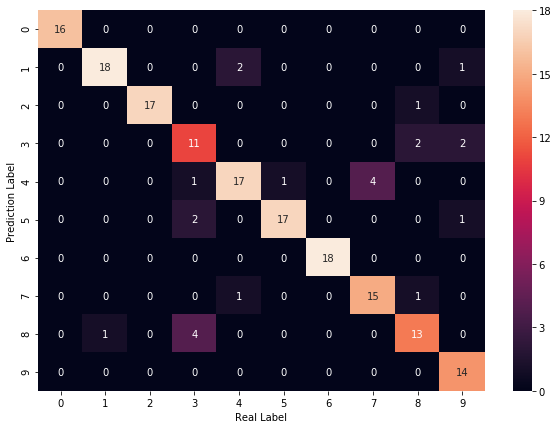

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:21 index:[5] real:5
#1 min_error:27 index:[2] real:2
#2 min_error:18 index:[8] real:8
#3 min_error:7 index:[0] real:0
#4 min_error:23 index:[1] real:1
#5 min_error:23 index:[7] real:7
#6 min_error:20 index:[6] real:6
#7 min_error:21 index:[3] real:3
#8 min_error:10 index:[2] real:2
#9 min_error:25 index:[1] real:1
#10 min_error:34 index:[4] real:7
#11 min_error:23 index:[1] real:4
#12 min_error:15 index:[6] real:6
#13 min_error:18 index:[3] real:3
#14 min_error:23 index:[1] real:1
#15 min_error:22 index:[3] real:3
#16 min_error:32 index:[9] real:9
#17 min_error:20 index:[1] real:1
#18 min_error:31 index:[7] real:7
#19 min_error:8 index:[6] real:6
#20 min_error:15 index:[8] real:8
#21 min_error:14 index:[4] real:4
#22 min_error:17 index:[3] real:3
#23 min_error:29 index:[1] real:1
#24 min_error:13 index:[4] real:4
#25 min_error:15 index:[0] real:0
#26 min_error:17 index:[5] real:5
#27 min_error:16 index:[3] real:3
#28 min_error:24 index:[6] real:6
#29 min_error:29 index:[9]

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8936301793444651
Avg Base Learner:0.8087816944959804


In [17]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1987 Total connections::2301


In [18]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    
    # the index of maximum in each line
    return px_outputs

In [19]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        pred_outputs = get_pred_real(i, j)
        pred.append(pred_outputs)
    
    error = []
    for i in range(10):
        loss = 0
        for ii in range(len(pred)):
            #print(number_codes[0][ii], pred[ii][0])
            #print (pred[ii][0][number_codes[0][ii]])
            #loss += (1 - pred[ii][0][number_codes[i][ii]])**2
            z = pred[ii][0][number_codes[i][ii]]
            
            #loss += np.log(1 + np.exp(-z)) # c45
            #loss += np.exp(-z)# adaboost
            loss += (1-z)**2
        error.append(loss)
    
    pred_value.append(np.where(error==np.min(error)))

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889